# Projet: Kayak 20 sept 2021
**<p>Author: Said SOUFYAN</p>**

**Install necessary Packages**

In [2]:
!pip install plotly

  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [78]:
#import necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
from plotly.subplots import make_subplots

import plotly.express as px
import plotly.graph_objects as go

#additionnal parameters about graphics 
sns.set(rc={'figure.figsize':(11.7,8.27)})
pio.renderers.default ="iframe_connected"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

ds = pd.read_csv("src/speed_dating_data.csv", encoding = 'ISO-8859-1')

ds.head(10)
#print(ds.shape)
#declare a clean funtion which will be used to format the income amount which is by default foramted in "english format" to a standard format ex :1,000.23 => 1000
def clean(txt):
    txt = txt.replace(",","")
    numb = int(txt[1:].split(".")[0])
    return numb

#ds["income"] =(ds["income"].replace('[\$\,]',"",regex=True).astype(int) )
#display(ds["income"])
#mask =( ( ds['income'] > 0) & (ds['wave'] == 20 ) )
#ds["Attrition"] = ds["Attrition"].replace('Yes',1)


#Starting DataPrep and cleanig process 
ds["gender"] =ds["gender"].replace(1,'Femme')
ds["gender"] =ds["gender"].replace(0,'Homme')
ds["match2"] =ds["match"]
ds["match"] =ds["match"].replace(1,'Yes')
ds["match"] =ds["match"].replace(0,'Non')
ds["income"] = ds["income"].fillna("$0.00")
ds["income"] = ds["income"].apply(clean)





**EDA using Seaborn**


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='income', ylabel='Density'>

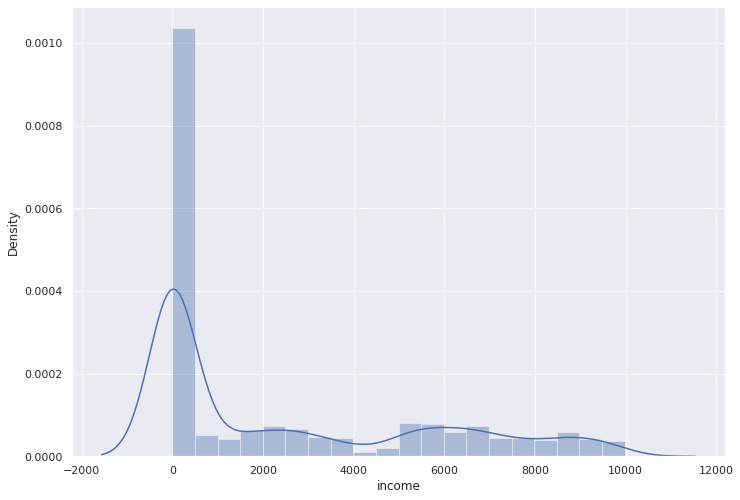

In [15]:
sns.distplot(ds["income"])


we see above that too many of paticpants didn't have or declare an income during their subscription



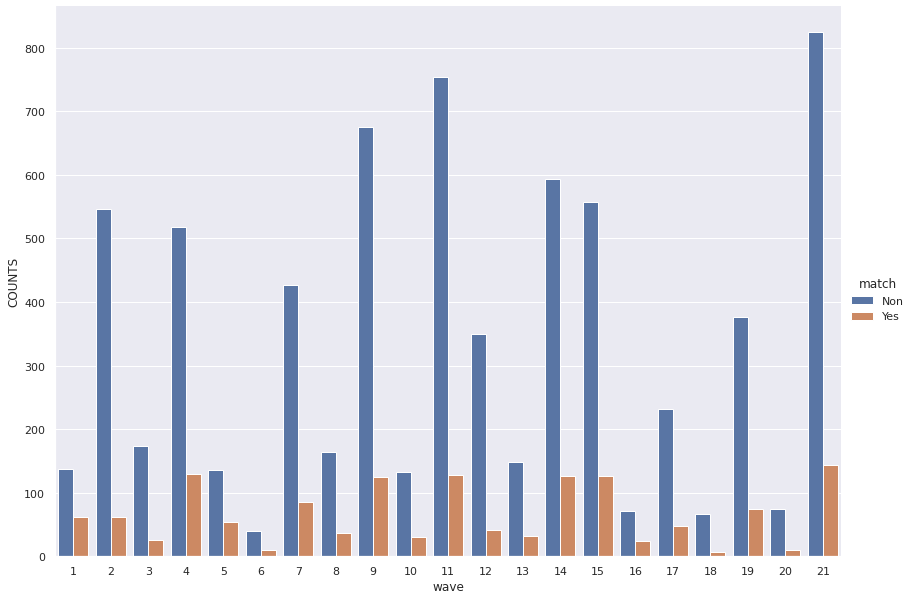

In [18]:
dsMatch=ds.groupby(['wave','match']).size().reset_index(name='COUNTS')
#display(dsMatch)
#explode =(0,0.2)
#plt.pie(dsGender['COUNTS'], labels=dsMatch['match'], autopct='%1.1f%%')
sns.catplot(x="wave", y="COUNTS", hue="match", kind="bar", data=dsMatch,  height=8.27, aspect=11.7/8.27)


we see in this graphic the proportion of matching during each wave the first one look being succeful but nexts ones look not 

8377

,samerace,match,%match
0,Non,Non,0.507103
1,Non,Yes,0.097171
2,Yes,Non,0.328280
3,Yes,Yes,0.067566


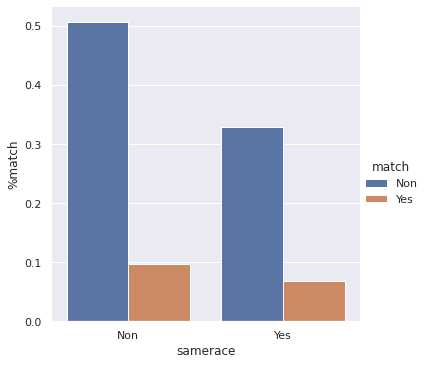

In [20]:
ds['race'] =ds['race'].replace(1,"Black/African American")
ds['race'] =ds['race'].replace(2,"European/Caucasian-American")
ds['race'] =ds['race'].replace(3,"Latino/Hispanic American")
ds['race'] =ds['race'].replace(4,"Asian/Pacific Islander/Asian-American")
ds['race'] =ds['race'].replace(5,"Native American")
ds['race'] =ds['race'].replace(6,"Other")

ds['samerace'] =ds['samerace'].replace(1,"Yes")
ds['samerace'] =ds['samerace'].replace(0,"Non")

dsMatchRace=ds.groupby(['samerace','match']).size().reset_index(name='%match')
display(ds.id.count())
dsMatchRace['%match']= dsMatchRace['%match'] /ds.id.count()
display(dsMatchRace)
#explode =(0,0.2)
#plt.pie(dsGender['COUNTS'], labels=dsMatch['match'], autopct='%1.1f%%')
#dsMatchRace =dsMatchRace.loc[dsMatchRace['match'] == "Yes"]
sns.catplot(x="samerace", y="%match", kind="bar", hue="match" ,data=dsMatchRace)
#plt.legend()
#plt.show()

#corr = dsMatchRace.corr()
#display(corr)

**EDA using :**
**<p>- plotly express</p>**
**<p>- plotly Graph Objects</p>**
**<p>- matplotlib</p>**

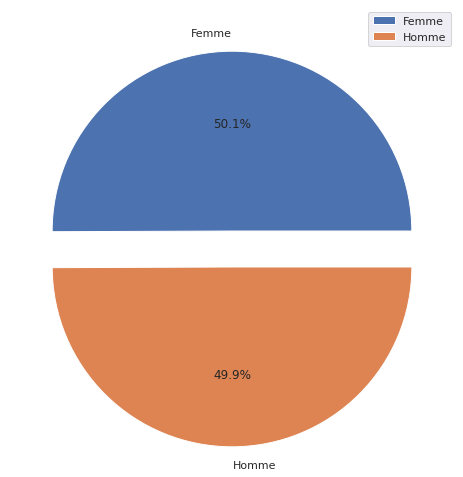

In [11]:
dsGender=ds.groupby(['gender']).size().reset_index(name='COUNTS')

#display(dsGender)
explode =(0,0.2)
plt.pie(dsGender['COUNTS'], labels=dsGender['gender'], autopct='%1.1f%%', explode =explode)
plt.legend()
plt.show()

we see in the graphic above an equity of participant this waves 

In [65]:
ds['race'] =ds['race'].replace(1,"Black/African American")
ds['race'] =ds['race'].replace(2,"European/Caucasian-American")
ds['race'] =ds['race'].replace(3,"Latino/Hispanic American")
ds['race'] =ds['race'].replace(4,"Asian/Pacific Islander/Asian-American")
ds['race'] =ds['race'].replace(5,"Native American")
ds['race'] =ds['race'].replace(6,"Other")

ds['samerace'] =ds['samerace'].replace(1,"Yes")
ds['samerace'] =ds['samerace'].replace(0,"Non")

dsMatchRace=ds.groupby(['race','match']).size().reset_index(name='cntmatch')
dsMatchRaceY=dsMatchRace[dsMatchRace["match"]=='Yes']
dsMatchRaceN=dsMatchRace[dsMatchRace["match"]=='Non']
#display(dsMatchRace)
#explode =(0,0.2)
fig = go.Figure()

long_df = px.data.medals_long()

fig.add_trace(
    go.Bar(
                x =dsMatchRaceY['race'] ,
                y = dsMatchRaceY['cntmatch'],name="Yes Matching"
               
        
              
                )
)

fig.add_trace(
    go.Bar(
                x =dsMatchRaceN['race'] ,
                y = dsMatchRaceN['cntmatch'],name="Non Matching"
                
              
                )
)
#plt.bar(ind,dsMatchRace['race'],y=dsMatchRace['cntmatch'],color='match',width=0.25)
fig.update_layout(
    title_text="Couple Matching based on race")
fig.show()

#corr = dsMatchRace.corr()
#display(corr)

In [6]:
dsRace=ds.groupby(['race','match']).size().reset_index(name='Nbmatch')

dsRacePiv= pd.pivot_table(dsRace, values = 'Nbmatch', index=['race'], columns = 'match').reset_index()

dsRacePiv["%yesnon"]=round(dsRacePiv["Yes"] / (dsRacePiv["Non"]+dsRacePiv["Yes"]),2)
#dsRacePiv['%match']= dsRace['%match'] /ds.id.count()
dsRacePiv.head(10)
fig = px.line(dsRacePiv.sort_values(by = '%yesnon'), x="race", y="%yesnon")
fig.show()






In [7]:
ds.head(10)
dsRacePopPie=ds.groupby(['race']).size().reset_index(name='NbRace')
dsRacePopPie.head(10)
fig = px.pie(ds,values='id', names='race',title='Population race participating in all waves' )
fig.show()

**EDA Using plotly**

In [74]:
ds.head(10)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,match2
0,1,1.0,Homme,1,1,1,10,7,NaN,4,1,11.0,Non,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521",9487,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,0
1,1,1.0,Homme,1,1,1,10,7,NaN,3,2,12.0,Non,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521",9487,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,0
2,1,1.0,Homme,1,1,1,10,7,NaN,10,3,13.0,Yes,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521",9487,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,1
3,1,1.0,Homme,1,1,1,10,7,NaN,5,4,14.0,Yes,0.61,0,23.0,2.0,30.00,5.00,1

In [136]:
dsGender=ds.groupby(['wave','gender','match']).size().reset_index(name='CntByGender')

dsGender= pd.pivot_table(dsGender, values = 'CntByGender', index=['wave'], columns = 'match').reset_index()
dsGender['%match']=100* dsGender['Yes'] /(dsGender['Non'] +dsGender['Yes'] )

dsPart=ds.groupby(['wave']).size().reset_index(name='CntPart')

In [95]:
dsPart.head()

,wave,gender,CntPart
0,1,Femme,100
1,1,Homme,100
2,2,Femme,304
3,2,Homme,304
4,3,Femme,100


In [141]:
dsGender.head(70)

match,wave,%match
0,1,31.000000
1,2,10.197368
2,3,13.000000
3,4,20.061728
4,5,28.421053
5,6,20.000000
6,7,16.796875
7,8,18.000000
8,9,15.500000
9,10,18.518519


In [142]:
fig = make_subplots(rows=1, cols=2)
dsGender= dsGender[['wave','%match']]
fig.add_bar(x=dsGender["wave"], 
                y=dsGender["%match"],                 
                name="%Matching by waves", 
                row=1, 
                col=1)

fig.add_scatter(x= dsPart["wave"] ,y=dsPart['CntPart'],
                name="Particpation in waves", 
                row=1, 
                col=2)
 
fig.show()